In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', #'China', 'Germany',
                      'UK', 'France', 'Brazil',
                      #'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
                       'Russia', 'Mexico']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan',
          'New Zealand': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Deaths = DF.copy()

In [9]:
Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,30601,633522,628873,144430,35092,28429,45639,30185,84082,12873,41908
2020-07-24,31358,639666,635016,145560,35097,28432,45762,30195,85238,13026,42645
2020-07-25,32060,644533,639881,146465,35102,28432,45823,30195,86449,13172,42645
2020-07-26,32771,648656,644004,146935,35107,28432,45837,30195,87004,13249,43680
2020-07-27,33408,654052,649396,148011,35112,28432,45844,30212,87618,13334,44022


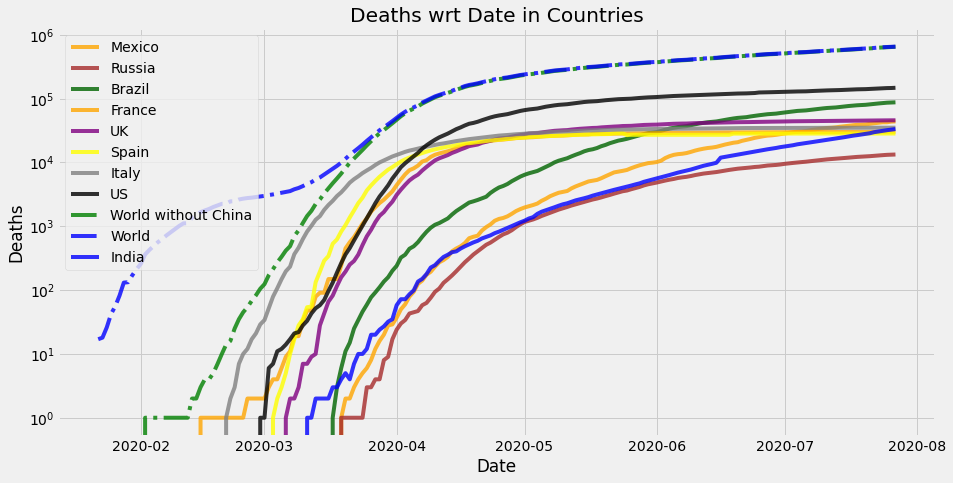

In [10]:
plotter(Deaths, 'Deaths')

In [11]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,642.64,5619.64,5619.07,795.71,11.86,2.00,68.00,14.50,1064.14,146.21,598.71
2020-07-24,659.64,5679.14,5678.50,818.50,11.36,2.07,73.36,13.43,1060.00,144.71,603.86
2020-07-25,670.50,5677.00,5676.21,834.86,11.21,2.07,67.14,13.43,1070.00,141.71,565.36
2020-07-26,685.50,5689.07,5688.29,837.86,10.93,2.07,66.64,13.43,1064.57,137.93,619.57
2020-07-27,691.50,5802.00,5800.93,888.93,10.36,1.86,66.36,12.86,1056.07,136.57,609.36


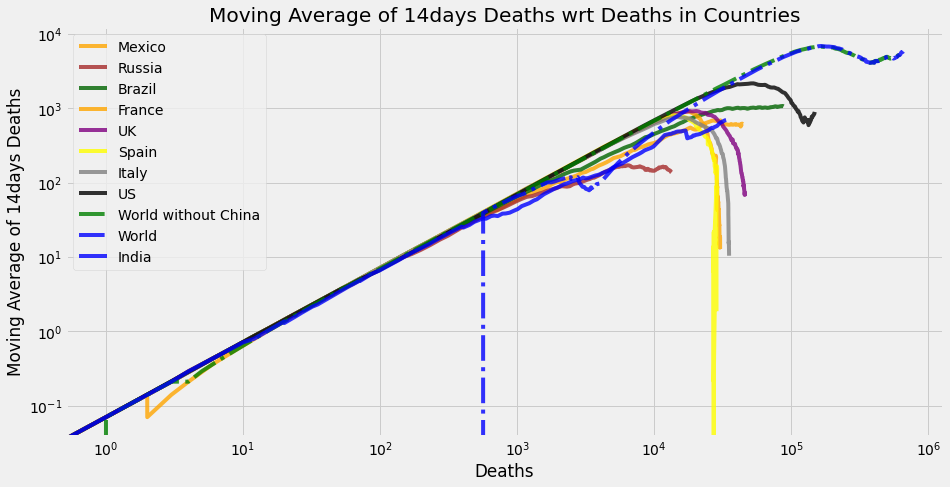

In [12]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [13]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,714,6249,6249,867,11,2,62,6,1056,136,619
2020-07-24,726,6164,6163,899,10,2,63,6,1055,131,619
2020-07-25,749,6055,6054,907,9,2,66,6,1097,135,537
2020-07-26,753,6069,6068,914,9,2,65,6,1074,132,642
2020-07-27,761,6245,6244,998,8,1,64,5,1071,132,648


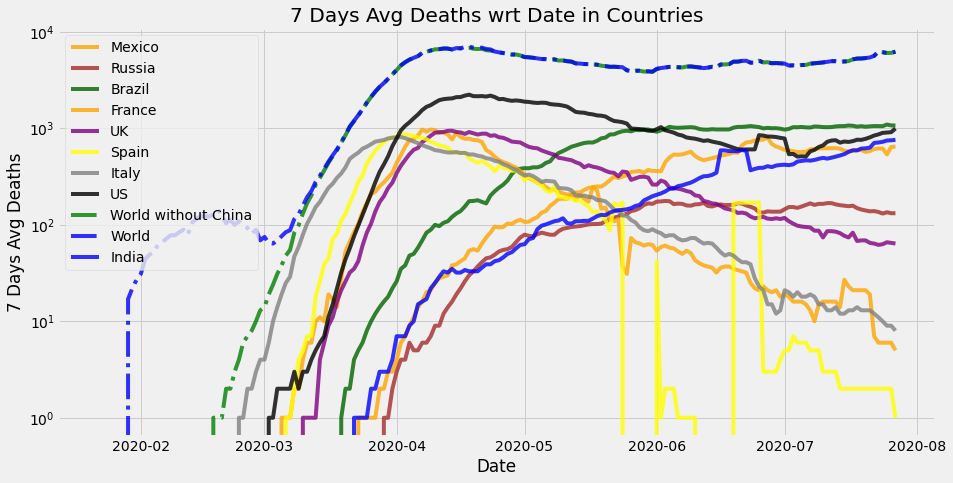

In [14]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [15]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,840,7729,7728,1135,11,2,81,2,1321,155,808
2020-07-24,875,7698,7697,1146,8,3,85,9,1250,155,748
2020-07-25,733,6992,6991,1050,7,2,79,7,1226,149,485
2020-07-26,723,5045,5044,835,5,1,66,3,974,125,591
2020-07-27,683,4795,4793,817,5,0,27,6,793,103,459


In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,740,9966,9965,1114,10,3,53,10,1311,147,718
2020-07-24,757,6144,6143,1130,5,3,123,10,1156,153,737
2020-07-25,702,4867,4865,905,5,0,61,0,1211,146,0
2020-07-26,711,4123,4123,470,5,0,14,0,555,77,1035
2020-07-27,637,5396,5392,1076,5,0,7,17,614,85,342


In [17]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(8), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  1.3652
World                  1.2142
World without China    1.2140
US                     1.3213
Italy                  0.6088
Spain                  0.4000
UK                     0.8297
France                 0.2703
Brazil                 1.0255
Russia                 0.8485
Mexico                 1.0617
Name: 2020-07-27 00:00:00, dtype: float64

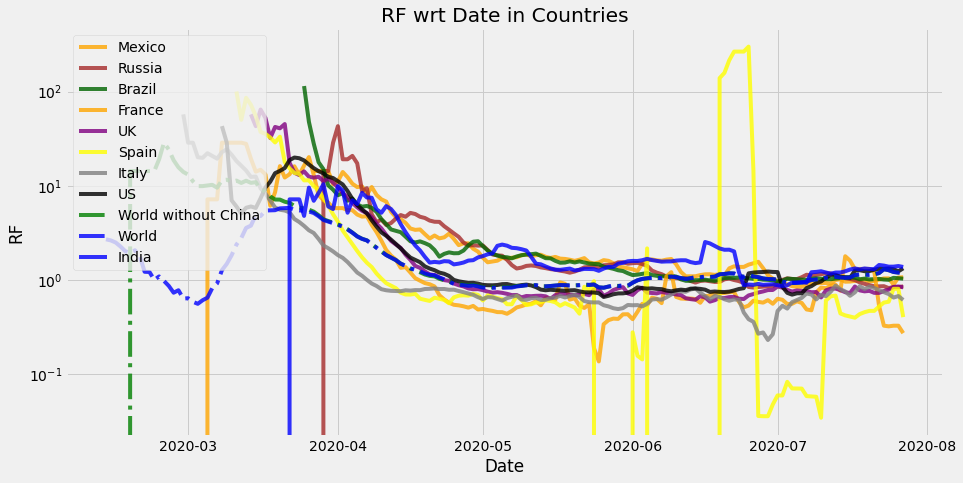

In [18]:
plotter(Reproductivity, 'RF')
pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

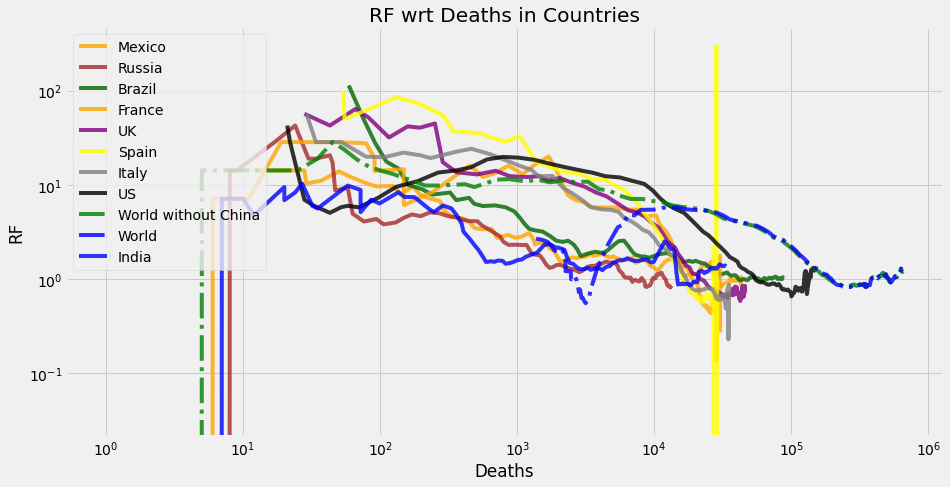

In [19]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [20]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [21]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [22]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-07-23,0.0233,0.0099,0.0099,0.0060,0.0003,0.0001,0.0014,0.0002,0.0126,0.0106,0.0148
2020-07-24,0.0232,0.0096,0.0097,0.0062,0.0003,0.0001,0.0014,0.0002,0.0124,0.0101,0.0145
2020-07-25,0.0234,0.0094,0.0095,0.0062,0.0003,0.0001,0.0014,0.0002,0.0127,0.0102,0.0126
2020-07-26,0.0230,0.0094,0.0094,0.0062,0.0003,0.0001,0.0014,0.0002,0.0123,0.0100,0.0147
2020-07-27,0.0228,0.0095,0.0096,0.0067,0.0002,0.0000,0.0014,0.0002,0.0122,0.0099,0.0147


In [23]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

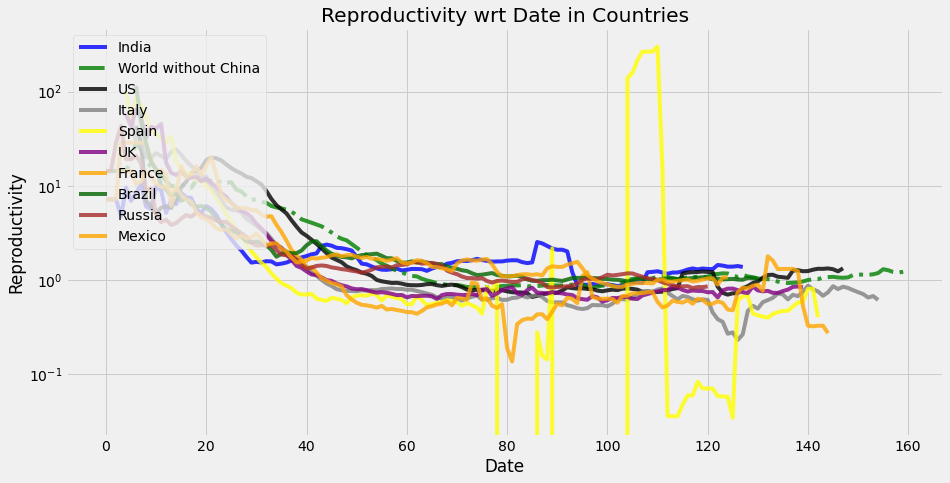

In [24]:
RF = days100(Reproductivity)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [25]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=190)

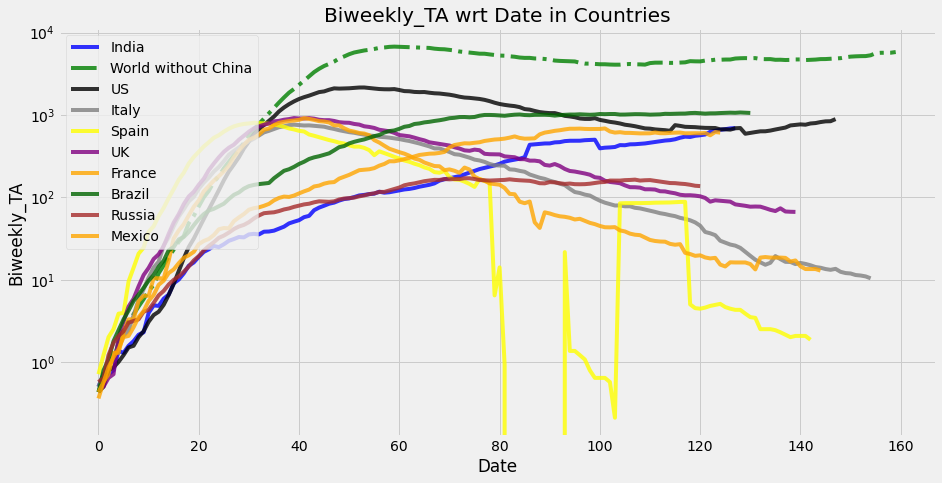

In [26]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

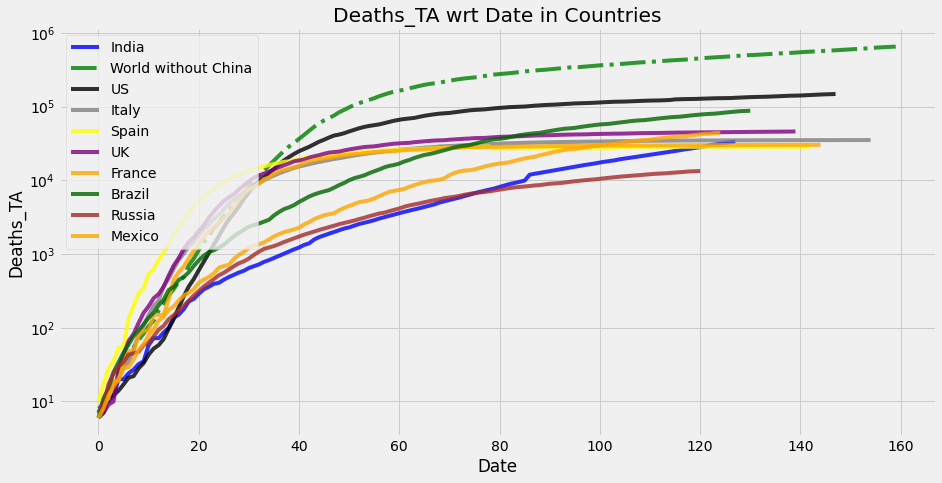

In [27]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [28]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [29]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [30]:
for name, df in {'Deaths': Deaths, 
           'BiweeklyDeaths': Biweekly_Deaths,
           'Daily_Deaths': Daily_Deaths,
           'Reproductivity': Reproductivity,
          }.items():
    csvify(df, name)
    csvify(TA(df), 'TA_' + name)

In [31]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,654052,5802.00,6245,4795,5396,1.2142
World without China,649396,5800.93,6244,4793,5392,1.2140
US,148011,888.93,998,817,1076,1.3213
Brazil,87618,1056.07,1071,793,614,1.0255
UK,45844,66.36,64,27,7,0.8297
Mexico,44022,609.36,648,459,342,1.0617
Italy,35112,10.36,8,5,5,0.6088
India,33408,691.50,761,683,637,1.3652
France,30212,12.86,5,6,17,0.2703


In [32]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,654052,5802.00,6245,4795,5396,1.2142
World without China,649396,5800.93,6244,4793,5392,1.2140
Brazil,87618,1056.07,1071,793,614,1.0255
US,148011,888.93,998,817,1076,1.3213
India,33408,691.50,761,683,637,1.3652
Peru,18418,454.57,719,192,575,3.8745
Mexico,44022,609.36,648,459,342,1.0617
South Africa,7067,206.79,271,241,298,2.0687
Colombia,8777,237.29,264,267,508,1.3832


In [33]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.9) & (LastDay_DF['Weekly Deaths']>100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Brazil,87618,1056.07,1071,793,614,1.0255
Colombia,8777,237.29,264,267,508,1.3832
India,33408,691.50,761,683,637,1.3652
Iran,15912,205.71,215,208,212,1.1502
Mexico,44022,609.36,648,459,342,1.0617
Peru,18418,454.57,719,192,575,3.8745
South Africa,7067,206.79,271,241,298,2.0687
US,148011,888.93,998,817,1076,1.3213
World,654052,5802.00,6245,4795,5396,1.2142
